In [ ]:
# Imports
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

In [ ]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [ ]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
# Compile the model
model.compile(
  optimizer="adam",
  loss="sparse_categorical_crossentropy",
  metrics=["accuracy"]
)

In [ ]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2927 - accuracy: 0.9155 - val_loss: 0.1354 - val_accuracy: 0.9581
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1420 - accuracy: 0.9579 - val_loss: 0.0980 - val_accuracy: 0.9701
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1053 - accuracy: 0.9681 - val_loss: 0.0859 - val_accuracy: 0.9727
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0873 - accuracy: 0.9732 - val_loss: 0.0854 - val_accuracy: 0.9736
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0747 - accuracy: 0.9765 - val_loss: 0.0753 - val_accuracy: 0.9759
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0641 - accuracy: 0.9800 - val_loss: 0.0749 - val_accuracy: 0.9769
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0565 - accuracy: 0.9819 - val_loss: 0.0732 - val_accuracy:

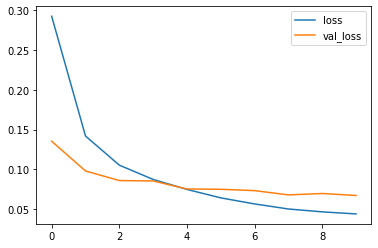

In [ ]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

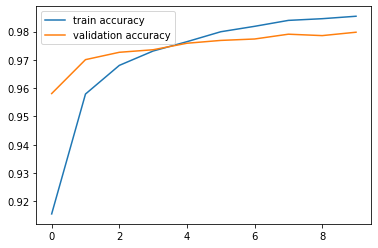

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history["accuracy"], label="train accuracy")
plt.plot(r.history["val_accuracy"], label="validation accuracy")
plt.legend()

In [ ]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0671 - accuracy: 0.9798
[0.06709736585617065, 0.9797999858856201]


Confusion matrix, without normalization
[[ 971    0    2    1    2    0    1    1    2    0]
 [   0 1126    3    0    0    1    2    1    2    0]
 [   3    1 1009    2    3    0    2    6    6    0]
 [   0    0    6  986    0    5    0    6    3    4]
 [   1    0    0    0  963    0    5    1    1   11]
 [   3    0    0    6    3  870    3    2    5    0]
 [   7    3    0    1    6    5  934    0    2    0]
 [   3    4   10    2    0    0    0  999    1    9]
 [   4    0    1    5    4    0    3    3  952    2]
 [   1    2    0    4    5    4    0    5    0  988]]


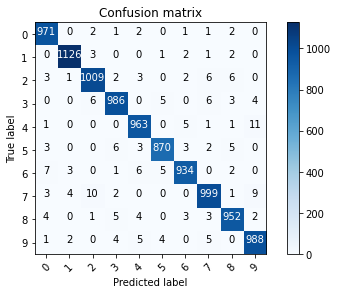

In [ ]:
# Plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

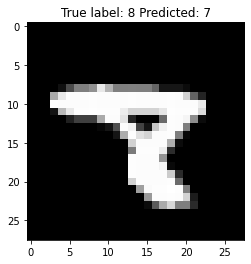

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

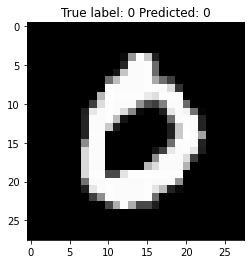

In [ ]:
# Show some random examples
random_idx = p_test[0]
i = np.random.choice(random_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));